Using TensorFlow backend.
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\envs\aidemy\lib\site-packages\tensorflow\python\framework\dtypes.py

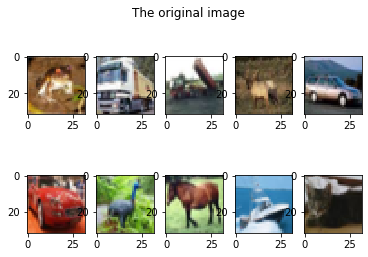

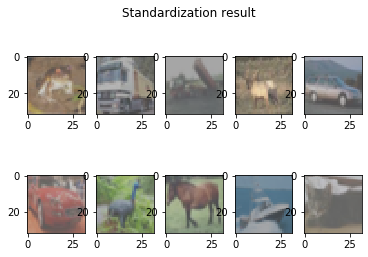

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# Generator를 생성하세요
datagen = ImageDataGenerator( samplewise_center=True,
                             samplewise_std_normalization=True)

# 표준화합니다
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 생성한 이미지를 보기 좋게 만듭니다
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

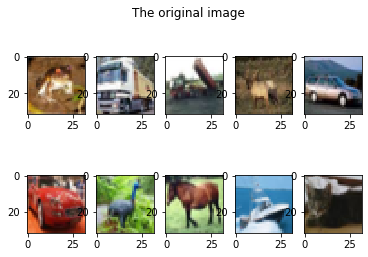

E:\Anaconda3\envs\aidemy\lib\site-packages\keras_preprocessing\image.py:758: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


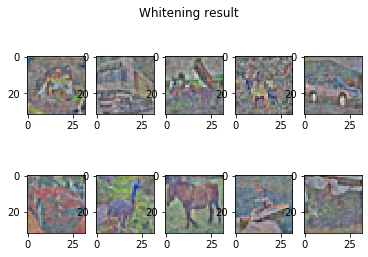

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 전체 데이터 중 학습에는 300장, 테스트에는 100장의 데이터를 사용합니다
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# Generator를 생성하세요
datagen = datagen = ImageDataGenerator(zca_whitening=True)

# 백색화합니다
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 생성한 이미지를 보기 좋게 만듭니다
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 3ms/step - loss: 2.3076 - acc: 0.1400 - val_loss: 2.2596 - val_acc: 0.1833
Epoch 2/3
300/300 [==============================] - 0s 897us/step - loss: 2.1911 - acc: 0.3133 - val_loss: 2.2002 - val_acc: 0.2633
Epoch 3/3
300/300 [==============================] - 0s 817us/step - loss: 2.1220 - acc: 0.4167 - val_loss: 2.1666 - val_acc: 0.3433


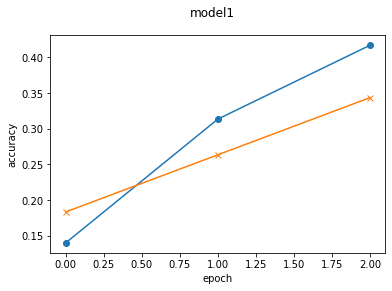

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 4ms/step - loss: 1.8897 - acc: 0.4033 - val_loss: 1.7229 - val_acc: 0.5100
Epoch 2/3
300/300 [==============================] - 0s 911us/step - loss: 0.6545 - acc: 0.8100 - val_loss: 1.2731 - val_acc: 0.6300
Epoch 3/3
300/300 [==============================] - 0s 823us/step - loss: 0.3986 - acc: 0.8800 - val_loss: 1.1974 - val_acc: 0.6733


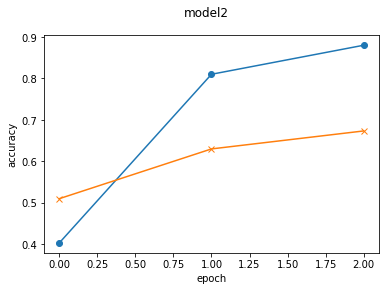

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1, 28, 28, 1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1, 28, 28, 1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

# model1(활성화 함수로 sigmoid 함수를 쓰는 모델)을 정의합니다
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

# 컴파일합니다
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 학습시킵니다
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 시각화합니다
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model1', fontsize=12)
plt.show()

# model2(활성화 함수로 ReLU를 쓰는 모델)을 정의합니다
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
# 배치 정규화를 추가하세요
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(Activation('relu'))
# 배치 정규화를 추가하세요
model2.add(BatchNormalization())
model2.add(Dense(10))
model2.add(Activation('softmax'))

# 컴파일합니다
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 학습시킵니다
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 시각화합니다
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model2', fontsize=12)
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16

input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

model = Model(inputs=vgg16.input, outputs=top_model)

In [ ]:
# model의 19번째 층까지 vgg 모델
for layer in model.layers[:19]:
    layer.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

58892288/58889256 [==============================] - 499s 8us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_po

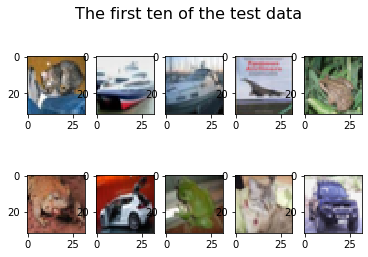

[6 8 9 9 6 6 1 6 5 7]


In [10]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensor를 정의하세요
input_tensor = Input(shape=(32, 32, 3))

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16과 top_model을 연결하세요
model = Model(inputs=vgg16.input, outputs=top_model)

# 19층째까지 가중치를 고정하세요
for layer in model.layers[:19]:
    layer.trainable = False

# 모델을 확인합니다
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# 사전에 학습된 모델을 저장해 놓았다면, 다음처럼 해당 모델을 읽어들일 수 있습니다
# model.load_weights('param_vgg.hdf5')

# 배치 크기 32, epoch 수 3으로 학습을 실시합니다
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

# 다음과 같이 모델을 저장할 수 있습니다
model.save_weights('param_vgg.hdf5')

# 정확도를 평가합니다
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 데이터를 시각화합니다(테스트 데이터의 선두 10장)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

# 예측합니다(테스트 데이터의 선두 10장)
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

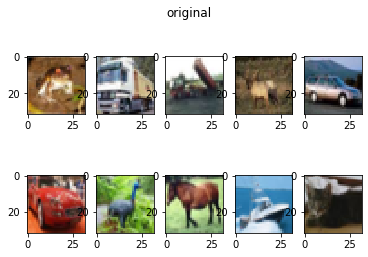

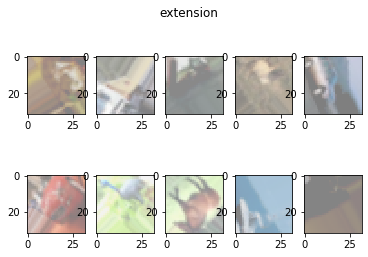

In [12]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# 이미지 데이터를 읽습니다
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#　이미지를 표시합니다
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('original', fontsize=12)
plt.show()

# 확장할 때의 설정을 기술하세요(자유롭게 설정하세요)
generator = ImageDataGenerator(
                    rotation_range=90, # 90°까지 회전합니다
                    width_shift_range=0.3, # 수평으로 무작위 시프트시킵니다
                    height_shift_range=0.3, # 수직으로 무작위 시프트시킵니다
                    channel_shift_range=70.0, # 색조를 임의로 변경합니다
                    shear_range=0.39, # 대각선(pi/8까지)으로 잡아당깁니다
                    horizontal_flip=True, # 무작위로 수직 반전합니다
                    vertical_flip=True # 무작위로 수평 반전합니다
                    )

# 이미지를 확장하세요(.flow를 사용해 확장할 이미지 데이터를 전달합니다. 비교해서 표시하기 위해, shuffle=False를 지정하세요)
extension = generator.flow(X_train,shuffle=False)
X_batch  = extension.next()

# 생성한 이미지를 보기 좋게 만듭니다
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 확장된 이미지를 표시합니다
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()

In [13]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 로드하세요
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensor를 정의하여 vgg의 ImageNet으로 학습된 모델을 작성하세요
input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# 특징량 추출 부분의 모델을 만들고 있습니다
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16과 top_model을 연결하세요
model = Model(inputs=vgg16.input, outputs=top_model)

# 다음 for 문을 완성시켜, 15층까지의 가중치를 고정시켜주세요
for layer in model.layers[:15]:
    layer.trainable = False

#　학습하기 전에, 모델의 구조를 확인하세요
model.summary()

# 컴파일하고 있습니다
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# 사전에 학습된 모델을 저장해 놓았다면, 다음처럼 해당 모델을 읽어들일 수 있습니다
# model.load_weights('param_vgg_15.hdf5')

# 배치 크기 32로 학습을 실시합니다
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

# 다음과 같이 모델을 저장할 수 있습니다
model.save_weights('param_vgg_15.hdf5')

# 정확도를 평가합니다
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________